[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Dessia-tech/tutorials/blob/notebook/notebook/power_transmission.ipynb)

# Initialization (only for Colab users)

In [ ]:
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y jupyter
!conda install -q -y google-colab -c conda-forge
!python -m ipykernel install --name "py38" --user
!conda update conda -y
!conda update pip -y

--2022-10-06 09:29:48--  https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89817099 (86M) [application/x-sh]
Saving to: ‘mini.sh’

mini.sh             100%[===================>]  85.66M   215MB/s    in 0.4s    

2022-10-06 09:29:49 (215 MB/s) - ‘mini.sh’ saved [89817099/89817099]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - failed with repodata from current_re

In [ ]:
# Reload the web page (quit) and execute this cell
import sys
print("User Current Version:-", sys.version)
if sys.version[:3] != "3.8":
  raise SystemError("Try to reload the web page (quit)")

User Current Version:- 3.8.1 (default, Jan  8 2020, 22:29:32) 
[GCC 7.3.0]


# Python imports

In [ ]:
!pip install dessia_common
!pip install volmdlr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.1/230.1 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 64.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.8/960.8 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━

In [ ]:
import math
import numpy as npy
from scipy.optimize import minimize
from typing import List, Tuple
from IPython.display import HTML
from dessia_common import PhysicalObject, DessiaObject
import volmdlr as vm
import volmdlr.primitives3d as primitives3d
import volmdlr.primitives2d as primitives2d

# Casing

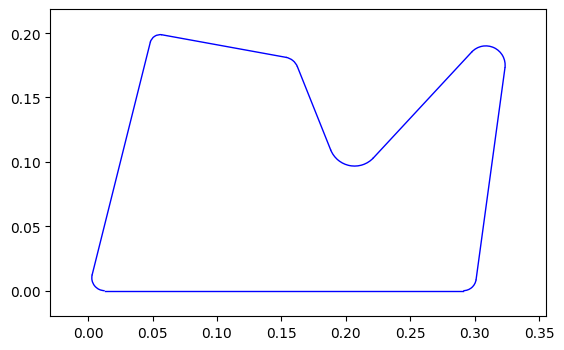

<AxesSubplot: >

In [ ]:
p1 = vm.Point2D(0, 0)
p2 = vm.Point2D(0.3, 0)
p3 = vm.Point2D(0.33, 0.22)
p4 = vm.Point2D(0.2, 0.08)
p5 = vm.Point2D(0.16, 0.18)
p6 = vm.Point2D(0.05, 0.20)

inner_contour = primitives2d.ClosedRoundedLineSegments2D(
    points=[p1, p2, p3, p4, p5, p6],
    radius={0: 0.01, 1: 0.01, 2: 0.015, 3: 0.020, 4: 0.012, 5:0.008},
    adapt_radius=True)

thickness = 0.005
outer_contour = inner_contour.offset(-thickness)

ax = inner_contour.plot(color='b')
outer_contour.plot(ax=ax, color='r')

In [ ]:
height = 0.080

sides = primitives3d.ExtrudedProfile(
    plane_origin=vm.O3D,
    x=vm.X3D,
    y=vm.Y3D,
    outer_contour2d=outer_contour,
    inner_contours2d=[inner_contour],
    extrusion_vector=(height - 2 * thickness) * vm.Z3D,
    name='sides')

# Jupyter Notebook usage
sides.save_babylonjs_to_file(filename='/tmp/sides')
HTML(filename='/tmp/sides.html')

In [ ]:
bottom = primitives3d.ExtrudedProfile(
    plane_origin=vm.O3D,
    x=vm.X3D,
    y=vm.Y3D,
    outer_contour2d=outer_contour,
    inner_contours2d=[],
    extrusion_vector=-thickness * vm.Z3D,
    name='bottom')

# Jupyter Notebook usage
bottom.save_babylonjs_to_file(filename='/tmp/bottom')
HTML(filename='/tmp/bottom.html')

In [ ]:
belt_width = 0.011
belt_outer_contour = inner_contour.offset(-belt_width)

belt = primitives3d.ExtrudedProfile(
    plane_origin=vm.Z3D*(height - 2*thickness),
    x=vm.X3D,
    y=vm.Y3D,
    outer_contour2d=belt_outer_contour,
    inner_contours2d=[inner_contour],
    extrusion_vector=thickness * vm.Z3D,
    name='belt')

# Jupyter Notebook usage
belt.save_babylonjs_to_file(filename='/tmp/belt')
HTML(filename='/tmp/belt.html')

In [ ]:
casing = vm.core.VolumeModel([bottom, sides, belt], name='Casing')

# Jupyter Notebook usage
casing.save_babylonjs_to_file(filename='/tmp/casing')
HTML(filename='/tmp/casing.html')

In [ ]:
lid = primitives3d.ExtrudedProfile(
    plane_origin=vm.Z3D*(height - thickness),
    x=vm.X3D,
    y=vm.Y3D,
    outer_contour2d=belt_outer_contour,
    inner_contours2d=[],
    extrusion_vector=thickness * vm.Z3D,
    name='lid')

casing = vm.core.VolumeModel([bottom, sides, belt, lid], name='Casing')

# Jupyter Notebook usage
casing.save_babylonjs_to_file(filename='/tmp/casing')
HTML(filename='/tmp/casing.html')

In [ ]:
casing.to_step('/tmp/casing')